In [1]:
#this is a data cleaning jupyter notebook on horse racing data

import pandas as pd
import numpy as np
import regex
import time
import os
import seaborn as sns
%pwd

'/home/neilfa/jupyter_data_cleaning'

In [2]:
with open('/proc/meminfo') as file:
    for line in file:
        if 'MemFree' in line:
            free_mem_in_kb = line.split()[1]
            break
file_path = '2019_1_1-2020_1_1.csv' 
file_size = os.path.getsize(file_path)
            
start = time.time()
df = pd.read_csv(file_path)
end = time.time()
index = df.index
num_row = len(index)

print('It takes {0} seconds to load in {1} rows of data (size of the file is {2} bytes), with {3} memory available'.format((end-start),num_row,file_size,free_mem_in_kb))

It takes 0.17240428924560547 seconds to load in 31651 rows of data (size of the file is 14016826 bytes), with 9239132 memory available


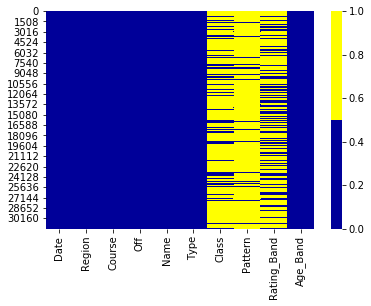

In [3]:
# missing values analysis

cols = df.columns[:10] # first 30
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#normal for class to have missing values as Ireland races don't have a class




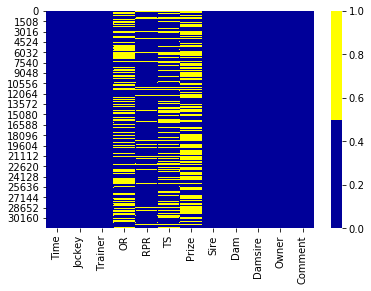

In [4]:

cols = df.columns[30:42] # last 12
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
# Gonna make a smaller dataframe (sm_df)
# Just to make it easier to work with

sm_df = df.loc[:,('Date','Off','Name','Horse','Pos','SP','Ran','Time','RPR',)]
sm_df.head()

,Date,Off,Name,Horse,Pos,SP,Ran,Time,RPR
0,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Swordsman (IRE),1,3/1,15,5:1.80,127.0
1,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Westport Lady (FR),2,8/1,15,5:4.20,111.0
2,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Momus (IRE),3,10/11F,15,5:5.15,115.0
3,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Tara Mill (IRE),4,25/1,15,5:5.40,112.0
4,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Impatient Partner (IRE),5,8/1,15,5:5.70,111.0


In [6]:
# sorting out the fractional odds to decimal odds, and having a new column saying if they are favourite
# decimal odds are easier to work with 
# decimal odds = numerator / denominator + 1

fodds = df.loc[:,'SP'] #fractional odds
fodds = fodds.str.replace("Evens","1/1")
fodds = fodds.str.replace("Evs","1/1")
splt = fodds.str.extract(r'(\d+).(\d+)(.?)')

splt.iloc[:,0] = splt.iloc[:,0].astype(float)
splt.iloc[:,1] = splt.iloc[:,1].astype(float)

dodds = (splt.iloc[:,0]/splt.iloc[:,1])+1 #decimal odds

odds_f = pd.concat([dodds,splt.iloc[:,2]],axis=1)

sm_df.loc[:,'SP'] = odds_f.iloc[:,0]
sm_df = pd.concat([sm_df,odds_f.iloc[:,1]],axis=1)


sm_df=sm_df.rename(columns={2:"Fav"})

#There are 3 possible letters that can come after the odds:
#F there is one favourite in the race (7/2F)
#J there are 2 favourite in the race (same odds) (7/2J,7/2J)
#C there are 3 favourite (3/1C,3/1C,3/1C)

#Instead of keeping the letters
#Gonna make a new column with series of bool - favorite TRUE or FALSE

sm_df.loc[:,"Fav"] = sm_df.loc[:,"Fav"].str.contains(r"\S") 

sm_df.head()





,Date,Off,Name,Horse,Pos,SP,Ran,Time,RPR,Fav
0,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Swordsman (IRE),1,4.000000,15,5:1.80,127.0,False
1,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Westport Lady (FR),2,9.000000,15,5:4.20,111.0,False
2,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Momus (IRE),3,1.909091,15,5:5.15,115.0,True
3,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Tara Mill (IRE),4,26.000000,15,5:5.40,112.0,False
4,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Impatient Partner (IRE),5,9.000000,15,5:5.70,111.0,False


In [7]:
#New horse name with only the name
#New column with the horse's country

nme = sm_df.loc[:,'Horse']
splt = nme.str.extract(r"(.+)\s\((\w+)\)")
sm_df['Horse'] = splt.iloc[:,0]
sm_df['Horse_nation'] = splt.iloc[:,1]
sm_df.head(15)



,Date,Off,Name,Horse,Pos,SP,Ran,Time,RPR,Fav,Horse_nation
0,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Swordsman,1,4.000000,15,5:1.80,127.0,False,IRE
1,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Westport Lady,2,9.000000,15,5:4.20,111.0,False,FR
2,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Momus,3,1.909091,15,5:5.15,115.0,True,IRE
3,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Tara Mill,4,26.000000,15,5:5.40,112.0,False,IRE
4,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Impatient Partner,5,9.000000,15,5:5.70,111.0,False,IRE
5,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,The Echo Boy,6,11.000000,15,5:11.30,85.0,False,IRE
6,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Galboystown Rose,7,101.000000,15,5:14.30,60.0,False,IRE
7,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Robbies Magic,8,101.000000,15,5:16.30,58.0,False,IRE
8,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Take A Turn,9,26.000000,15,5:17.10,51.0,False,IRE
9,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Goodkess,10,34.000000,15,5:24.50,17.0,False,IRE


In [8]:
#Now I need to convert time from string to actual time in seconds
#5:1.80 = 5min and 1.8 seconds
print(type(sm_df.loc[0,'Time']))
tme = sm_df['Time']
mtch = tme.str.extract(r"(\d+):(.+)")
mtch[0] = mtch[0].astype(float)
mtch[1] = mtch[1].astype(float)
sm_df['Time'] = (mtch[0]*60)+mtch[1]
#sm_df.iloc[[0,15],:]
sm_df.head()

<class 'str'>


,Date,Off,Name,Horse,Pos,SP,Ran,Time,RPR,Fav,Horse_nation
0,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Swordsman,1,4.000000,15,301.80,127.0,False,IRE
1,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Westport Lady,2,9.000000,15,304.20,111.0,False,FR
2,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Momus,3,1.909091,15,305.15,115.0,True,IRE
3,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Tara Mill,4,26.000000,15,305.40,112.0,False,IRE
4,2019-01-01,12:20,Happy New Year from all at Fairyhouse Maiden H...,Impatient Partner,5,9.000000,15,305.70,111.0,False,IRE


In [9]:
#There is an important error to fix
#The name of a race might be duplicated ie, the same named race can occur on 2 different dates
#What needs to be done:
#1. Need to create a column identifying whether or not the race is a handicapped
    #creating a new bool series identicating whether the race is handicapped or not might be useful for analysis
#2. Create a new unique set of IDs for the race:
    # how to do this step I'm not sure

pattern = "andica"
sm_df['Handicap'] = sm_df['Name'].str.contains(pattern)


pattern2 = "aiden"
sm_df['Maiden_race'] = sm_df['Name'].str.contains(pattern2)
#total number of races = group by date, time of race(Off) and name
#ie. impossible for 2 race to occur at the same time on the same day with the same name


grpDN = sm_df.groupby(['Date','Off','Name']) 
grpN = sm_df.groupby(['Name'])
print("there are {} races with the same name\ntotal number of races is {} in 2019".format((grpDN.ngroups-grpN.ngroups),grpDN.ngroups))


there are 406 races with the same name
total number of races is 2677 in 2019


In [10]:
#Creating a Unique ID for each race (UID)
#year(2019) + the index number (could be alphabetical) not important as long as the UID

UID = list()
racesnu = grpDN.ngroups
for i in range(racesnu):
    UID.append('2019'+(str(i+1)))

#append value to a already excisting key
#https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/#:~:text=this'%3A%2043%7D-,Append%20multiple%20key%20value%20pair%20in%20dictionary,it%20will%20update%20its%20value.
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value    


#Still trying to find a way to easily assign UIDs
#Trying not to do any real complicated loops
#If you look at the pattern of 'Ran'
#it looks something like 3,3,3,4,4,4,4,2,2
#if I turn that list into 3,4,2 , Ie  first race 3 ran 2nd race 4 ran etc
#Then i can create a list that goes like:
    #repeat UID 3 times then repeat the next UID 4 times etc

lsRan = list(sm_df['Ran'])

for i, x in enumerate(lsRan):
    del lsRan[i+1:i+x]

#the loop below confirms that there is in fact 2677 not 2663
cnt =0 
test = dict(sm_df['Ran'].value_counts())
for keys in test:
    cnt += (test[keys]/keys)

lsUID = [] #list of all the UIDs that can go in the dataframe
for i in range(len(UID)):
    lc = [UID[i]]*lsRan[i]
    for j in lc:
        lsUID.append(j)
sm_df['UID']=lsUID

#Now each race a UID



In [11]:
#Still trying to find a way to easily assign UIDs
#Trying not to do any real complicated loops
#If you look at the pattern of 'Ran'
#it looks something like 3,3,3,4,4,4,4,2,2
#if I turn that list into 3,4,2 , Ie  first race 3 ran 2nd race 4 ran etc
#Then i can create a list that goes like:
    #repeat UID 3 times then repeat the next UID 4 times etc

lsRan = list(sm_df['Ran'])

for i, x in enumerate(lsRan):
    del lsRan[i+1:i+x]

#the loop below confirms that there is in fact 2677 not 2663
cnt =0 
test = dict(sm_df['Ran'].value_counts())
for keys in test:
    cnt += (test[keys]/keys)

lsUID = []
for i in range(len(UID)):
    lc = [UID[i]]*lsRan[i]
    for j in lc:
        lsUID.append(j)


        


In [74]:
#Need to explore the RPR

#Hypothesis = Ones with no RPR will mostly always be towards the end
#Firstly need to sort out the position column

sm_df['true_Pos']=sm_df['Pos']
pos = sm_df.loc[:,('true_Pos')]
for i in range(len(pos)):
    try:
        int(pos[i])
    except:
        pos.iloc[i]=sm_df.loc[i,'Ran']

sm_df['true_Pos'] = pd.to_numeric(sm_df['true_Pos'])


RprBool = pd.isna(sm_df['RPR'])
TotalNan = sm_df[RprBool]


#Now need to evaluate if no RPR correlates to bottom position
#Because 5th position from 5 runners is the same as 12th from 12
#I need to normalise the positions, so that they all ressemble 10 horse race
#formula: (pos / ran) * 10 
normPos = list()
tot = sm_df.shape[0]
for i in range(tot):
    tP = sm_df.loc[i,'true_Pos']
    ran = sm_df.loc[i,'Ran']
    val = (tP/ran)*10
    normPos.append(val)
sm_df['normPos'] = normPos

sm_df['RprBool']=RprBool

RvP = sm_df.loc[:,('RprBool','normPos')]
RvP['normPos'] = RvP['normPos'].round()
RvPt = RvP[(RvP['RprBool']==True)]
RvPf = RvP[(RvP['RprBool']==False)]
vc = RvPt['normPos'].value_counts()
#RvPhis = vc.plot(kind='bar', xlim=10)

#This graph shows you that indeed if the horse does not have an RPR
#It will most likely finish in a bottom position

#Need to know to a basic correlation graph
#btwn: RPR and position
Rc = sm_df.loc[:,('RPR','RprBool','normPos')]
Rc['normPos'] = Rc['normPos'].round()
RcT = Rc[(Rc['RprBool']==False)]


#RPcorr = RcT[('RPR','normPos')].corr()












